In [20]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns

In [21]:
path = "/Users/damon/Desktop/Dessertion/1-Data Collection/edges.csv"

In [22]:
path_graph =  "/Users/damon/Desktop/Dessertion/2-Network Analysis/"

In [23]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [24]:
print(nx.info(G))

Graph with 13904 nodes and 93275 edges


/var/folders/7r/_sxj1fdj35s2vf0dwxh35nnc0000gn/T/ipykernel_2188/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [25]:
# fitting the degree distribution of the RW
degrees = [d for u, d in G.degree()]  
cmodel = nx.configuration_model(degrees) 
print("Nodes:", cmodel.number_of_nodes())
print("Edges:", cmodel.number_of_edges())

Nodes: 13904
Edges: 93275


In [26]:
nx.write_graphml(cmodel, path_graph+"CM_Network.graphml")

## 1 - Degree Distribution

In [27]:
path_img = "/Users/damon/Desktop/Dessertion/2-Network Analysis"
path_graph = "/Users/damon/Desktop/Dessertion/2-Network Analysis"

def degree_dist(G, name, directory):
    hist = nx.degree_histogram(G)
    plt.plot(range(0, len(hist)), hist, ".")
    plt.title(f"Degree Distribution for {name} graph")
    plt.xlabel("Degree")
    plt.ylabel("P(k)")
    plt.loglog()
    #plt.savefig(path_img+directory+"/degree_dist_"+name+".png")
    plt.show()

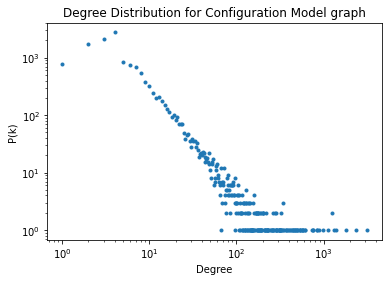

In [28]:
degree_dist(cmodel, "Configuration Model", "CM")

In [29]:
def plot_dist(G, name, directory):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    fig = plt.figure(figsize=(16, 6)) 
    print(f"**** Degree Distribution for {name} graph ****")
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    #plt.savefig(path_img+directory+"/degree_distribution_compare_"+name+".png")
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

/var/folders/7r/_sxj1fdj35s2vf0dwxh35nnc0000gn/T/ipykernel_2188/165580856.py:2: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  M = nx.to_scipy_sparse_matrix(G)


Calculating best minimal value for power law fit
**** Degree Distribution for Configuration Model graph ****


/var/folders/7r/_sxj1fdj35s2vf0dwxh35nnc0000gn/T/ipykernel_2188/165580856.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


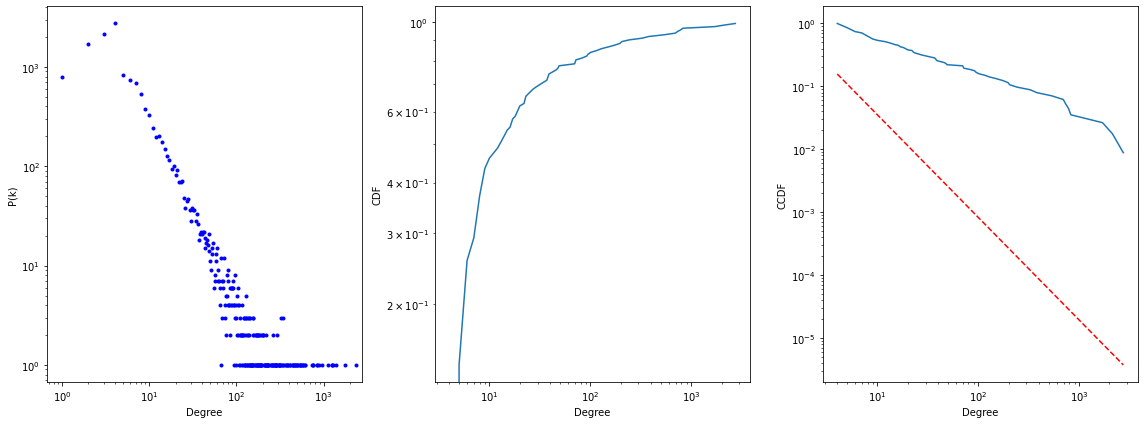

alpha=2.629719078011329 sigma=0.05923898779045357


In [30]:
plot_dist(cmodel, "Configuration Model", "CM")

In [31]:
def info_degree(G, name):
    print(f"***** Degree info for {name} graph ***")
    degree_sequence = sorted([(d, n) for n, d in G.degree()], reverse=True)
    dmax = max(degree_sequence)
    print("Maximum degree:", dmax)
    dmin = min(degree_sequence)
    print("Minimum degree:", dmin)

In [32]:
info_degree(cmodel , "Configuration Model")

***** Degree info for Configuration Model graph ***
Maximum degree: (3121, 5)
Minimum degree: (1, 140)


## 2 - Connected Components

In [33]:
def n_connected_components(G, name):
    print(f"**** Connected components for {name} graph ****")
    # list of connected components
    n_connected_component = list(nx.connected_components(G))
    print(f"Number of Connected Components for {name}: {len(n_connected_component)}")
    for i in range(len(n_connected_component)):
        if i < 3:
            print(f"\t component len = {len(n_connected_component[i])}")
    # Giant component -> Identify and store giant component
    H = nx.Graph()
    H = nx.subgraph(G,n_connected_component[0])
    nx.write_graphml(G, path_graph+"/giant_component/"+ name+".graphml")
    return n_connected_component

In [34]:
components = n_connected_components(cmodel , "Configuration Model")

**** Connected components for Configuration Model graph ****
Number of Connected Components for Configuration Model: 4
	 component len = 13898
	 component len = 2
	 component len = 2


## 3 - Path Analysis

In [35]:
def path_analysis(G, name, components):
    print(f"***** Path analysis for {name} graph")
    print(f"Diameter for components 0 network {name}: {nx.diameter(G.subgraph(components[0]))}")
    print(f"Average shortest path for components 0 network {name}: {nx.average_shortest_path_length(G.subgraph(components[0]))}")

In [36]:
path_analysis(cmodel , "Configuration Model", components)

***** Path analysis for Configuration Model graph
Diameter for components 0 network Configuration Model: 8
Average shortest path for components 0 network Configuration Model: 3.1764924546692446


## 4 - Clustering Coefficient

In [37]:
# not implemented for multigraph

## 5 - Density Analysis

In [38]:
def density_analysis(G, name):
    print(f"Density for {name} graph: {nx.density(G)}")

In [39]:
density_analysis(cmodel , "Configuration Model")

Density for Configuration Model graph: 0.0009650436813274813
